<a href="https://colab.research.google.com/github/saurabhmungale/DataScience_Assignements/blob/main/Object_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUe.1.Implement a Kalman filter to predict and update the state of an object given its measurementsC


In [1]:
import numpy as np

class KalmanFilter:
    def __init__(self, state_dim, measurement_dim):
        # Initialize state (x) and covariance (P) matrices
        self.x = np.zeros((state_dim, 1))  # State vector
        self.P = np.eye(state_dim)  # State covariance matrix

        # Initialize system matrices
        self.F = np.eye(state_dim)  # State transition matrix
        self.H = np.zeros((measurement_dim, state_dim))  # Measurement matrix
        self.Q = np.eye(state_dim)  # Process noise covariance
        self.R = np.eye(measurement_dim)  # Measurement noise covariance

        # Identity matrix
        self.I = np.eye(state_dim)

    def predict(self):
        """
        Predict the next state and covariance.
        """
        # Predict the state
        self.x = np.dot(self.F, self.x)

        # Predict the state covariance
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update(self, z):
        """
        Update the state and covariance using the measurement z.
        """
        # Calculate the innovation (measurement residual)
        y = z - np.dot(self.H, self.x)

        # Calculate the innovation covariance
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R

        # Calculate the Kalman gain
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))

        # Update the state estimate
        self.x = self.x + np.dot(K, y)

        # Update the state covariance matrix
        self.P = np.dot(self.I - np.dot(K, self.H), self.P)

    def set_matrices(self, F, H, Q, R):
        """
        Set the matrices F, H, Q, and R.
        """
        self.F = F
        self.H = H
        self.Q = Q
        self.R = R

# Example usage
if __name__ == "__main__":
    # Define dimensions
    state_dim = 2  # [position, velocity]
    measurement_dim = 1  # [position]

    # Initialize the Kalman filter
    kf = KalmanFilter(state_dim, measurement_dim)

    # Define the system matrices
    dt = 1  # Time step
    F = np.array([[1, dt], [0, 1]])  # State transition matrix
    H = np.array([[1, 0]])  # Measurement matrix
    Q = np.array([[1e-4, 0], [0, 1e-4]])  # Process noise covariance
    R = np.array([[1]])  # Measurement noise covariance

    kf.set_matrices(F, H, Q, R)

    # Simulated measurements
    measurements = [1, 2, 3, 4, 5]  # Example position measurements

    # Initial state
    kf.x = np.array([[0], [1]])  # Initial position = 0, velocity = 1

    # Run the filter
    for i, z in enumerate(measurements):
        print(f"Step {i + 1}:")
        print(f"Measurement: {z}")

        # Predict step
        kf.predict()
        print(f"Predicted state: \n{kf.x.flatten()}")

        # Update step
        kf.update(np.array([[z]]))
        print(f"Updated state: \n{kf.x.flatten()}")
        print("------------")


Step 1:
Measurement: 1
Predicted state: 
[1 1]
Updated state: 
[1. 1.]
------------
Step 2:
Measurement: 2
Predicted state: 
[2. 1.]
Updated state: 
[2. 1.]
------------
Step 3:
Measurement: 3
Predicted state: 
[3. 1.]
Updated state: 
[3. 1.]
------------
Step 4:
Measurement: 4
Predicted state: 
[4. 1.]
Updated state: 
[4. 1.]
------------
Step 5:
Measurement: 5
Predicted state: 
[5. 1.]
Updated state: 
[5. 1.]
------------


Que.2.C Write a function to normalize an image array such that pixel values are scaled between 0 and 1C


In [2]:
import numpy as np

def normalize_image(image_array):
    """
    Normalize an image array so that pixel values are scaled between 0 and 1.

    Parameters:
        image_array (numpy.ndarray): The input image array. Expected to have pixel values in any range.

    Returns:
        numpy.ndarray: The normalized image array with values between 0 and 1.
    """
    # Convert the array to a float type to avoid integer division issues
    image_array = image_array.astype(np.float32)

    # Find the minimum and maximum pixel values
    min_val = np.min(image_array)
    max_val = np.max(image_array)

    # Normalize the array to [0, 1]
    normalized_image = (image_array - min_val) / (max_val - min_val)

    return normalized_image

# Example usage
if __name__ == "__main__":
    # Create a sample image array (values range between 50 and 200)
    sample_image = np.array([[50, 100, 150],
                              [200, 125, 75]])

    print("Original Image Array:")
    print(sample_image)

    normalized_image = normalize_image(sample_image)

    print("\nNormalized Image Array:")
    print(normalized_image)


Original Image Array:
[[ 50 100 150]
 [200 125  75]]

Normalized Image Array:
[[0.         0.33333334 0.6666667 ]
 [1.         0.5        0.16666667]]


Que.3.Create a function to generate dummy object detection data with confidence scores and bounding boxes.
Filter the detections based on a confidence thresholdC

In [3]:
import numpy as np

def generate_dummy_detections(num_detections=10, image_size=(640, 480), min_confidence=0.0, max_confidence=1.0):
    """
    Generate dummy object detection data with confidence scores and bounding boxes.

    Parameters:
        num_detections (int): Number of detections to generate.
        image_size (tuple): Size of the image as (width, height).
        min_confidence (float): Minimum confidence score for generated detections.
        max_confidence (float): Maximum confidence score for generated detections.

    Returns:
        list: List of detections, each as a dictionary with 'confidence' and 'bbox'.
    """
    detections = []
    width, height = image_size

    for _ in range(num_detections):
        confidence = np.random.uniform(min_confidence, max_confidence)
        x_min = np.random.uniform(0, width * 0.8)  # Ensure bounding boxes fit in the image
        y_min = np.random.uniform(0, height * 0.8)
        box_width = np.random.uniform(10, width * 0.2)
        box_height = np.random.uniform(10, height * 0.2)
        x_max = min(x_min + box_width, width)
        y_max = min(y_min + box_height, height)

        detections.append({
            'confidence': confidence,
            'bbox': (x_min, y_min, x_max, y_max)  # Bounding box as (x_min, y_min, x_max, y_max)
        })

    return detections

def filter_detections_by_confidence(detections, confidence_threshold):
    """
    Filter detections based on a confidence threshold.

    Parameters:
        detections (list): List of detections, each as a dictionary with 'confidence' and 'bbox'.
        confidence_threshold (float): Minimum confidence score to keep a detection.

    Returns:
        list: List of filtered detections.
    """
    return [det for det in detections if det['confidence'] >= confidence_threshold]

# Example Usage
if __name__ == "__main__":
    # Generate dummy detections
    dummy_detections = generate_dummy_detections(num_detections=15, image_size=(640, 480))

    print("Generated Detections:")
    for det in dummy_detections:
        print(det)

    # Filter detections by confidence threshold
    confidence_threshold = 0.5
    filtered_detections = filter_detections_by_confidence(dummy_detections, confidence_threshold)

    print("\nFiltered Detections (Confidence >= 0.5):")
    for det in filtered_detections:
        print(det)


Generated Detections:
{'confidence': 0.3388850971812273, 'bbox': (58.931609041299794, 202.66126311904017, 102.7401340973032, 279.26568120468517)}
{'confidence': 0.8200724664647357, 'bbox': (100.64261052664983, 51.100783427067256, 123.28154876216253, 140.11778680124962)}
{'confidence': 0.23907232185648897, 'bbox': (509.15785259045686, 38.23500572320445, 561.120219574741, 57.310207968268436)}
{'confidence': 0.5219241744855352, 'bbox': (53.6611690517538, 94.13066001295014, 71.24113764115813, 165.6614574395291)}
{'confidence': 0.5321546400674236, 'bbox': (97.62505497687204, 91.82364385181673, 208.52934996091102, 146.4474867669044)}
{'confidence': 0.19737237044556233, 'bbox': (328.0458906025265, 229.4026973282683, 391.4381346912115, 294.81482300265264)}
{'confidence': 0.014864359747067457, 'bbox': (195.88292102299982, 22.975978562882858, 307.6583749893048, 60.382408079848965)}
{'confidence': 0.20935798420711138, 'bbox': (144.80120857745823, 35.97384366473423, 262.0461249835789, 89.308645054

Que4.Write a function that takes a list of YOLO detections and extracts a random 128-dimensional feature vector
for each detectionC

In [4]:
import numpy as np

def extract_random_features(yolo_detections, feature_dim=128):
    """
    Extract random feature vectors for YOLO detections.

    Parameters:
        yolo_detections (list): List of YOLO detections. Each detection is a dictionary with keys like 'class', 'confidence', 'bbox'.
        feature_dim (int): Dimensionality of the feature vector.

    Returns:
        list: List of dictionaries, each containing the original detection and a 'features' key with a random feature vector.
    """
    extracted_features = []

    for detection in yolo_detections:
        # Generate a random feature vector of specified dimensionality
        random_feature_vector = np.random.rand(feature_dim)

        # Add the feature vector to the detection
        detection_with_features = detection.copy()
        detection_with_features['features'] = random_feature_vector

        # Append to the results
        extracted_features.append(detection_with_features)

    return extracted_features

# Example usage
if __name__ == "__main__":
    # Example YOLO detections
    yolo_detections = [
        {'class': 'person', 'confidence': 0.85, 'bbox': (50, 100, 150, 200)},
        {'class': 'dog', 'confidence': 0.72, 'bbox': (30, 60, 120, 180)},
        {'class': 'cat', 'confidence': 0.65, 'bbox': (80, 150, 130, 190)}
    ]

    # Extract random 128-dimensional feature vectors
    feature_detections = extract_random_features(yolo_detections)

    # Display results
    for detection in feature_detections:
        print(f"Class: {detection['class']}, Confidence: {detection['confidence']}")
        print(f"Bounding Box: {detection['bbox']}")
        print(f"Features: {detection['features'][:5]}... (truncated for display)\n")


Class: person, Confidence: 0.85
Bounding Box: (50, 100, 150, 200)
Features: [0.32508434 0.30920049 0.52334865 0.35685842 0.60890243]... (truncated for display)

Class: dog, Confidence: 0.72
Bounding Box: (30, 60, 120, 180)
Features: [0.92224394 0.59819566 0.90404812 0.31609531 0.8395585 ]... (truncated for display)

Class: cat, Confidence: 0.65
Bounding Box: (80, 150, 130, 190)
Features: [0.35959403 0.49100145 0.05057723 0.12813999 0.29028502]... (truncated for display)



Que.5.Write a function to re-identify objects by matching feature vectors based on Euclidean distanceC

In [5]:
import numpy as np
from scipy.spatial.distance import cdist

def reidentify_objects(features_1, features_2, threshold=0.5):
    """
    Re-identify objects by matching feature vectors based on Euclidean distance.

    Parameters:
        features_1 (list): List of feature vectors for objects in the first frame/set.
        features_2 (list): List of feature vectors for objects in the second frame/set.
        threshold (float): Maximum Euclidean distance to consider a match.

    Returns:
        list: List of matched indices [(idx_1, idx_2)] where idx_1 is the index in features_1 and idx_2 in features_2.
    """
    # Compute pairwise Euclidean distances between features
    distances = cdist(features_1, features_2, metric='euclidean')

    matches = []
    for i, row in enumerate(distances):
        for j, dist in enumerate(row):
            if dist <= threshold:
                matches.append((i, j))

    return matches

# Example usage
if __name__ == "__main__":
    # Generate random feature vectors for two sets of objects
    np.random.seed(42)
    features_frame1 = np.random.rand(5, 128)  # 5 objects with 128-dimensional features
    features_frame2 = np.random.rand(6, 128)  # 6 objects with 128-dimensional features

    # Match objects based on Euclidean distance with a threshold
    threshold = 10.0
    matched_objects = reidentify_objects(features_frame1, features_frame2, threshold)

    # Display results
    print("Matched Object Indices:")
    for match in matched_objects:
        print(f"Object {match[0]} in frame 1 matched with object {match[1]} in frame 2.")


Matched Object Indices:
Object 0 in frame 1 matched with object 0 in frame 2.
Object 0 in frame 1 matched with object 1 in frame 2.
Object 0 in frame 1 matched with object 2 in frame 2.
Object 0 in frame 1 matched with object 3 in frame 2.
Object 0 in frame 1 matched with object 4 in frame 2.
Object 0 in frame 1 matched with object 5 in frame 2.
Object 1 in frame 1 matched with object 0 in frame 2.
Object 1 in frame 1 matched with object 1 in frame 2.
Object 1 in frame 1 matched with object 2 in frame 2.
Object 1 in frame 1 matched with object 3 in frame 2.
Object 1 in frame 1 matched with object 4 in frame 2.
Object 1 in frame 1 matched with object 5 in frame 2.
Object 2 in frame 1 matched with object 0 in frame 2.
Object 2 in frame 1 matched with object 1 in frame 2.
Object 2 in frame 1 matched with object 2 in frame 2.
Object 2 in frame 1 matched with object 3 in frame 2.
Object 2 in frame 1 matched with object 4 in frame 2.
Object 2 in frame 1 matched with object 5 in frame 2.
Obje

Que.6.C Write a function to track object positions using YOLO detections and a Kalman Filter?

In [7]:
import numpy as np
from scipy.optimize import linear_sum_assignment

class KalmanFilter:
    def __init__(self):
        # State: [x, y, vx, vy]
        self.state = None
        self.P = None  # Covariance matrix

        # State transition matrix
        self.F = np.array([[1, 0, 1, 0],
                           [0, 1, 0, 1],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])

        # Measurement matrix
        self.H = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0]])

        # Process noise covariance
        self.Q = np.eye(4) * 0.01

        # Measurement noise covariance
        self.R = np.eye(2) * 0.1

    def initialize(self, measurement):
        self.state = np.array([measurement[0], measurement[1], 0, 0], dtype=np.float64)
        self.P = np.eye(4, dtype=np.float64)

    def predict(self):
        self.state = np.dot(self.F, self.state)
        self.P = np.dot(self.F, np.dot(self.P, self.F.T)) + self.Q
        return self.state[:2]

    def update(self, measurement):
        y = measurement - np.dot(self.H, self.state)  # Innovation
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, np.dot(self.H.T, np.linalg.inv(S)))  # Kalman gain

        self.state += np.dot(K, y)
        self.P = np.dot(np.eye(4) - np.dot(K, self.H), self.P)

class Tracker:
    def __init__(self):
        self.trackers = []  # List of Kalman Filters
        self.track_ids = []  # Track IDs
        self.next_id = 0  # ID counter

    def update(self, detections):
        if not self.trackers:
            for det in detections:
                kf = KalmanFilter()
                kf.initialize(det)
                self.trackers.append(kf)
                self.track_ids.append(self.next_id)
                self.next_id += 1
            return self.track_ids, detections

        # Predict current positions for all trackers
        predicted_positions = [kf.predict() for kf in self.trackers]

        # Compute cost matrix based on Euclidean distance
        cost_matrix = np.zeros((len(predicted_positions), len(detections)))
        for i, pred in enumerate(predicted_positions):
            for j, det in enumerate(detections):
                cost_matrix[i, j] = np.linalg.norm(pred - det)

        # Solve assignment problem using Hungarian algorithm
        row_indices, col_indices = linear_sum_assignment(cost_matrix)

        assigned = set()
        for row, col in zip(row_indices, col_indices):
            if cost_matrix[row, col] < 50:  # Threshold to accept an assignment
                self.trackers[row].update(detections[col])
                assigned.add(col)

        # Add new trackers for unassigned detections
        for i, det in enumerate(detections):
            if i not in assigned:
                kf = KalmanFilter()
                kf.initialize(det)
                self.trackers.append(kf)
                self.track_ids.append(self.next_id)
                self.next_id += 1

        # Return tracked positions and IDs
        tracked_positions = [kf.state[:2] for kf in self.trackers]
        return self.track_ids, tracked_positions

# Example usage
if __name__ == "__main__":
    # Create the tracker
    tracker = Tracker()

    # Simulated YOLO detections (frame by frame)
    detections_frame1 = np.array([[100, 150], [200, 250], [300, 350]])
    detections_frame2 = np.array([[105, 155], [210, 260], [290, 340]])

    # Update the tracker with frame 1 detections
    ids_frame1, tracked_positions_frame1 = tracker.update(detections_frame1)
    print("Frame 1:")
    for tid, pos in zip(ids_frame1, tracked_positions_frame1):
        print(f"ID: {tid}, Position: {pos}")

    # Update the tracker with frame 2 detections
    ids_frame2, tracked_positions_frame2 = tracker.update(detections_frame2)
    print("\nFrame 2:")
    for tid, pos in zip(ids_frame2, tracked_positions_frame2):
        print(f"ID: {tid}, Position: {pos}")


Frame 1:
ID: 0, Position: [100 150]
ID: 1, Position: [200 250]
ID: 2, Position: [300 350]

Frame 2:
ID: 0, Position: [104.76303318 154.76303318]
ID: 1, Position: [209.52606635 259.52606635]
ID: 2, Position: [290.47393365 340.47393365]


Que.7. Implement a simple Kalman Filter to track an object's position in a 2D space (simulate the object's
movement with random noise).

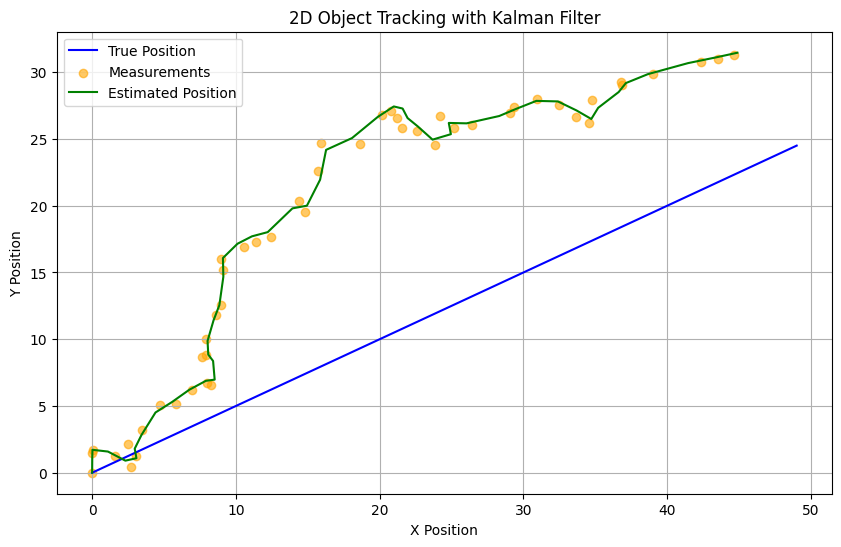

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter2D:
    def __init__(self):
        # State: [x, y, vx, vy] (position and velocity in 2D)
        self.state = np.zeros(4)  # Initial state: [0, 0, 0, 0]
        self.P = np.eye(4)  # Initial covariance matrix

        # State transition matrix (assume constant velocity model)
        self.F = np.array([[1, 0, 1, 0],
                           [0, 1, 0, 1],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])

        # Measurement matrix (we can observe position directly)
        self.H = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0]])

        # Process noise covariance (uncertainty in motion model)
        self.Q = np.eye(4) * 0.1

        # Measurement noise covariance (uncertainty in measurements)
        self.R = np.eye(2) * 0.5

    def predict(self):
        # Predict the next state
        self.state = np.dot(self.F, self.state)
        # Predict the next covariance
        self.P = np.dot(self.F, np.dot(self.P, self.F.T)) + self.Q
        return self.state[:2]  # Return predicted position

    def update(self, measurement):
        # Compute innovation
        y = measurement - np.dot(self.H, self.state)
        # Compute innovation covariance
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        # Compute Kalman gain
        K = np.dot(self.P, np.dot(self.H.T, np.linalg.inv(S)))
        # Update state
        self.state += np.dot(K, y)
        # Update covariance matrix
        self.P = np.dot(np.eye(4) - np.dot(K, self.H), self.P)
        return self.state[:2]  # Return updated position

# Simulate object's movement with random noise
def simulate_motion(steps, initial_position, velocity, noise_std):
    positions = [initial_position]
    for _ in range(steps - 1):
        new_position = positions[-1] + velocity + np.random.normal(0, noise_std, size=2)
        positions.append(new_position)
    return np.array(positions)

# Apply Kalman Filter to track the object
def track_object(steps, true_positions, measurements):
    kf = KalmanFilter2D()
    estimated_positions = []

    for measurement in measurements:
        kf.predict()
        estimated_position = kf.update(measurement)
        estimated_positions.append(estimated_position)

    return np.array(estimated_positions)

# Parameters
steps = 50
initial_position = np.array([0, 0])
velocity = np.array([1, 0.5])
noise_std = 1.0

# Simulate motion
true_positions = simulate_motion(steps, initial_position, velocity, 0.0)
measurements = simulate_motion(steps, initial_position, velocity, noise_std)

# Track object using Kalman Filter
estimated_positions = track_object(steps, true_positions, measurements)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(true_positions[:, 0], true_positions[:, 1], label="True Position", color='blue')
plt.scatter(measurements[:, 0], measurements[:, 1], label="Measurements", color='orange', alpha=0.6)
plt.plot(estimated_positions[:, 0], estimated_positions[:, 1], label="Estimated Position", color='green')
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("2D Object Tracking with Kalman Filter")
plt.grid()
plt.show()
